kornia.filters中的边缘检测

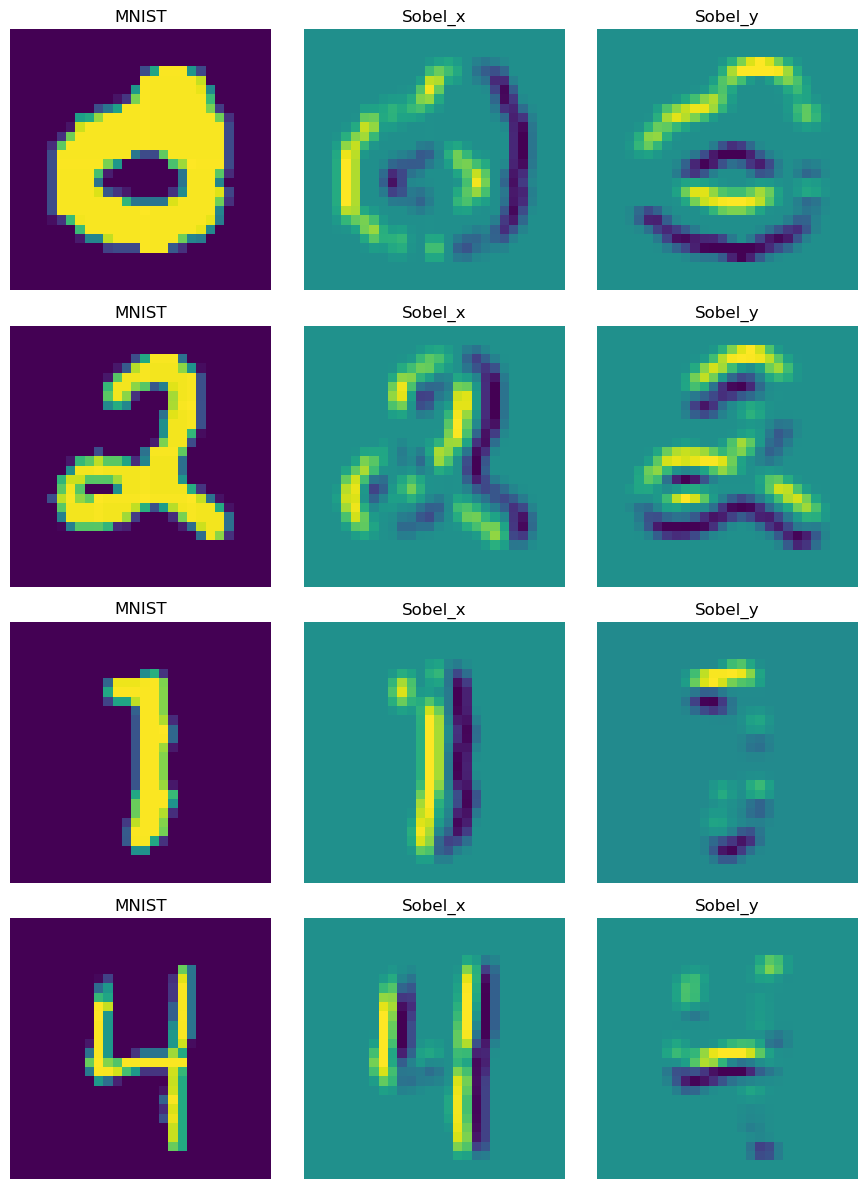

In [7]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia.filters import spatial_gradient

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用Sobel算子
gradients = [spatial_gradient(image) for image in images]
sobel_x_edges = [gradient[:, :, 0] for gradient in gradients]
sobel_y_edges = [gradient[:, :, 1] for gradient in gradients]


# 显示原始图像和边缘检测后的图像
fig, axs = plt.subplots(4, 3, figsize=(9, 12))

for i, (image, label, sobel_x_edge, sobel_y_edge) in enumerate(zip(images, labels, sobel_x_edges, sobel_y_edges)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(sobel_x_edge[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('Sobel_x')
    axs[i, 1].axis('off')
    
    axs[i, 2].imshow(sobel_y_edge[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 2].set_title('Sobel_y')
    axs[i, 2].axis('off')

plt.tight_layout()
plt.show()


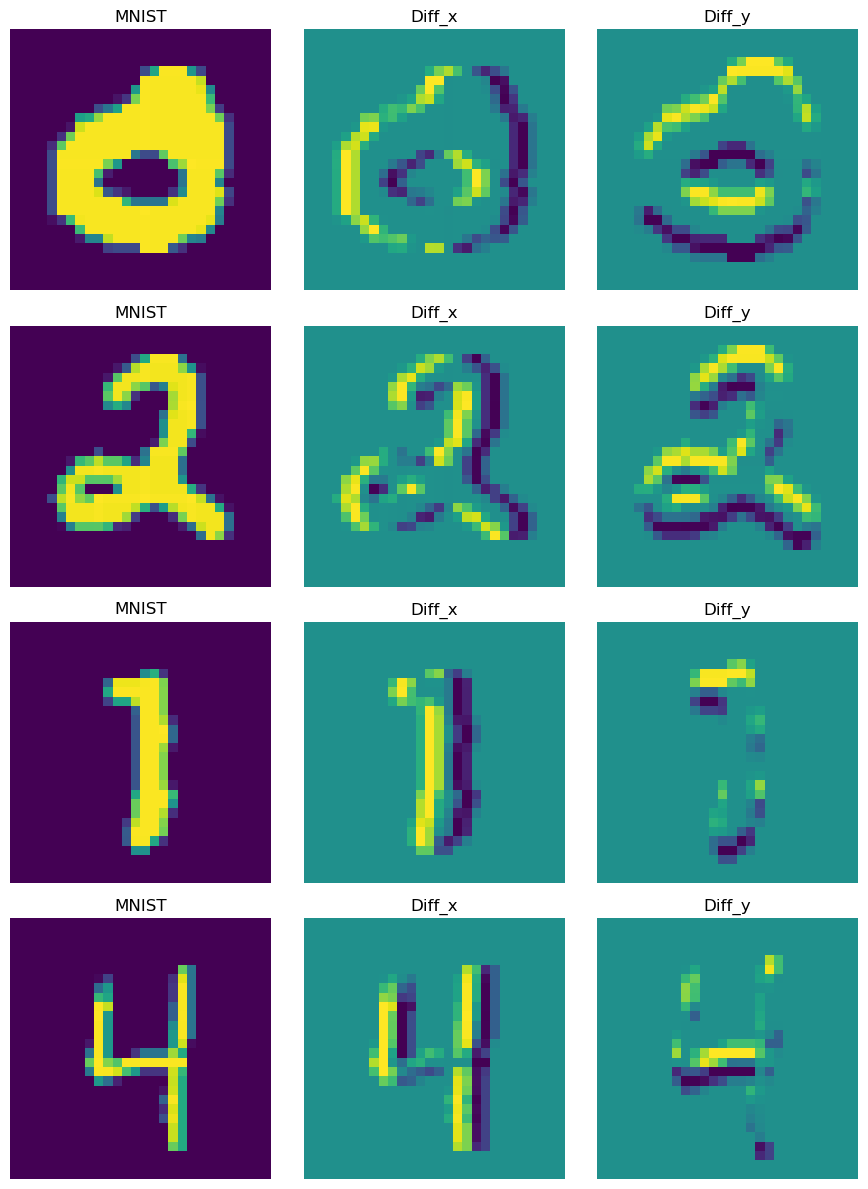

In [9]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia.filters import spatial_gradient

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用离散积分
gradients = [spatial_gradient(image, mode='diff') for image in images]
diff_x_edges = [gradient[:, :, 0] for gradient in gradients]
diff_y_edges = [gradient[:, :, 1] for gradient in gradients]


# 显示原始图像和边缘检测后的图像
fig, axs = plt.subplots(4, 3, figsize=(9, 12))

for i, (image, label, diff_x_edge, diff_y_edge) in enumerate(zip(images, labels, diff_x_edges, diff_y_edges)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(diff_x_edge[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('Diff_x')
    axs[i, 1].axis('off')
    
    axs[i, 2].imshow(diff_y_edge[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 2].set_title('Diff_y')
    axs[i, 2].axis('off')

plt.tight_layout()
plt.show()


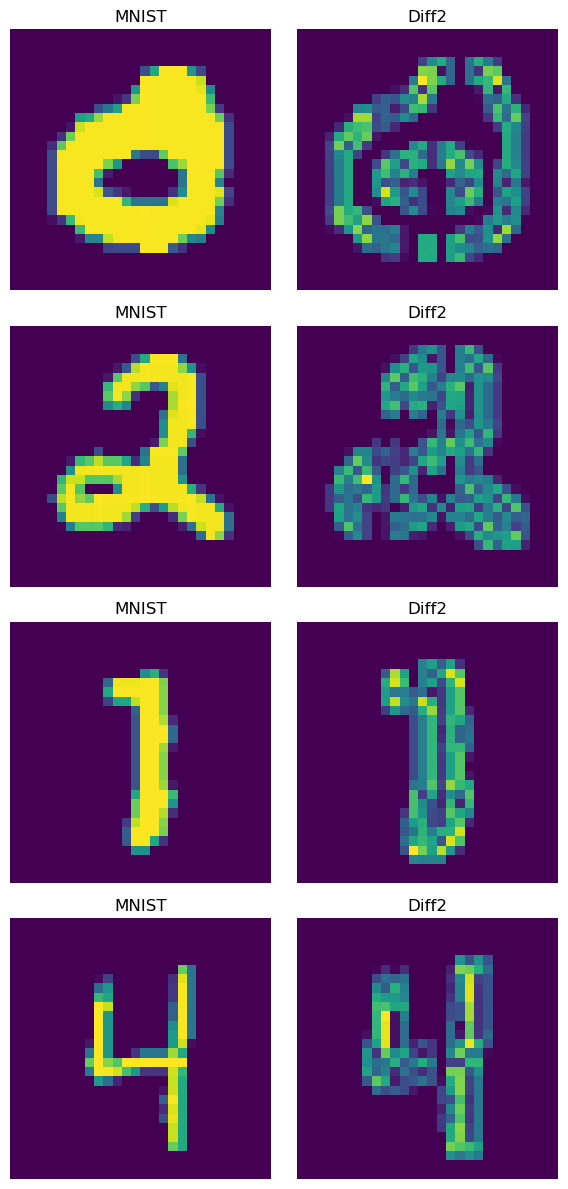

In [11]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia.filters import spatial_gradient

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用离散积分
gradients = [spatial_gradient(image, mode='diff', order=2) for image in images]
diff_edges = [torch.sqrt(gradient[:, :, 0]**2 + gradient[:, :, 1]**2) for gradient in gradients]

# 显示原始图像和边缘检测后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, diff_edge) in enumerate(zip(images, labels, diff_edges)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(diff_edge[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('Diff2')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


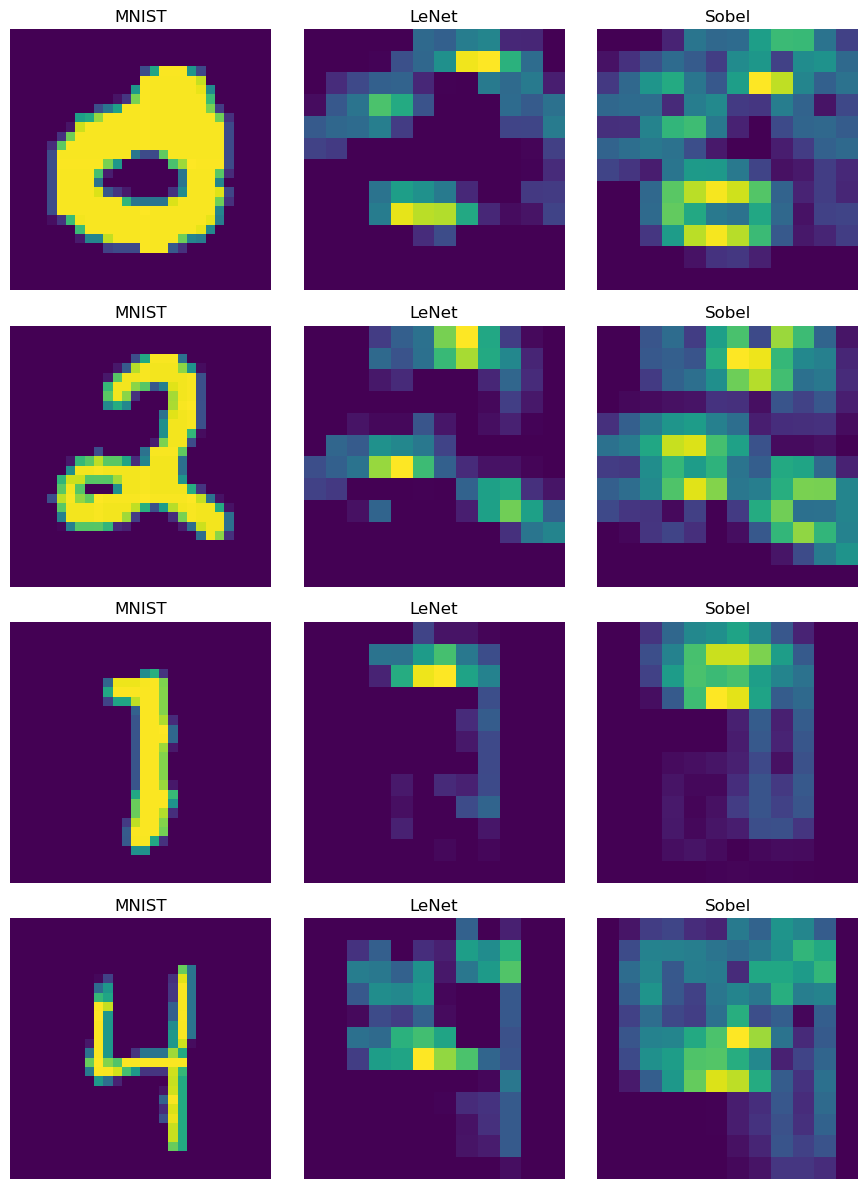

In [40]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia.filters import spatial_gradient
from neural_network import neural_networks

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 加载和准备LeNet模型
device = torch.device("cpu")
conv_path = "../output/LeNet/LeNet"
net = neural_networks["lenet"](10)
net.load_state_dict(torch.load(conv_path, map_location=device))
net = net.to(device)
net.eval()  # 设置为评估模式

# 获取第一层卷积的输出
def get_conv_output(images):
    with torch.no_grad():  # 跳过梯度计算
        output = net.conv1(images)  # 假设LeNet模型结构中conv1是第一层卷积
        return output

conv_outputs = [get_conv_output(image) for image in images]

# 应用Sobel算子
def apply_sobel(conv_output):
    gradient = spatial_gradient(conv_output)
    sobel_edge = torch.sqrt(gradient[:, :, 0]**2 + gradient[:, :, 1]**2)
    return sobel_edge

sobel_edges = [apply_sobel(output) for output in conv_outputs]

# 显示原始图像、LeNet第一层卷积的输出以及应用Sobel算子后的结果
fig, axs = plt.subplots(4, 3, figsize=(9, 12))

for i, (image, conv_output, sobel_edge) in enumerate(zip(images, conv_outputs, sobel_edges)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(conv_output[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('LeNet')
    axs[i, 1].axis('off')

    axs[i, 2].imshow(sobel_edge[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 2].set_title('Sobel')
    axs[i, 2].axis('off')

plt.tight_layout()
plt.show()


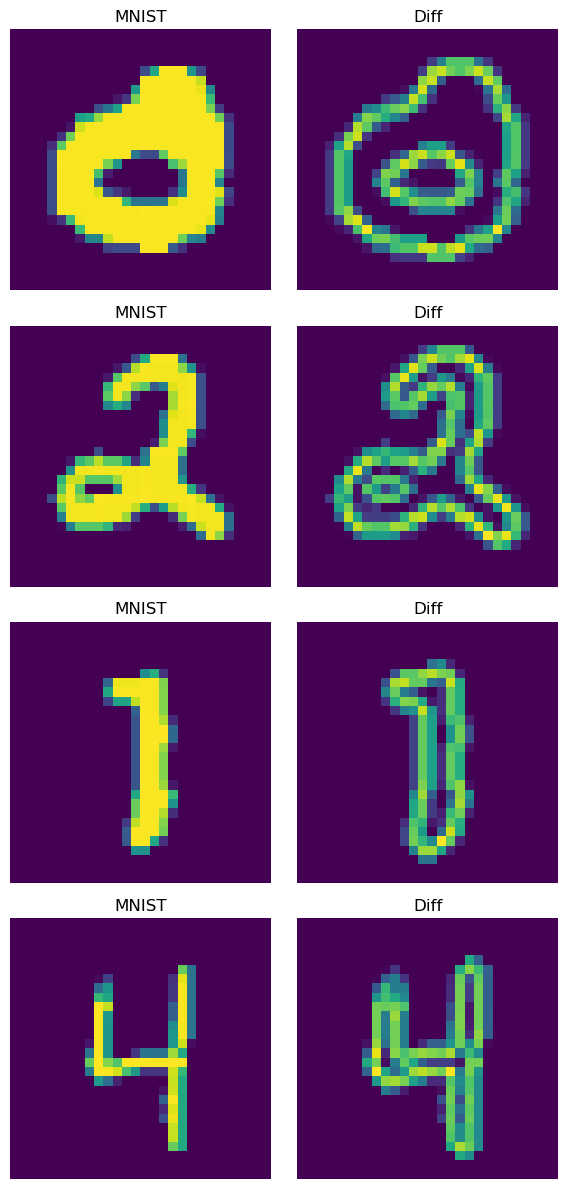

In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia.filters import spatial_gradient

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用离散积分
gradients = [spatial_gradient(image, mode='diff') for image in images]
diff_edges = [torch.sqrt(gradient[:, :, 0]**2 + gradient[:, :, 1]**2) for gradient in gradients]

# 显示原始图像和边缘检测后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, diff_edge) in enumerate(zip(images, labels, diff_edges)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(diff_edge[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('Diff')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


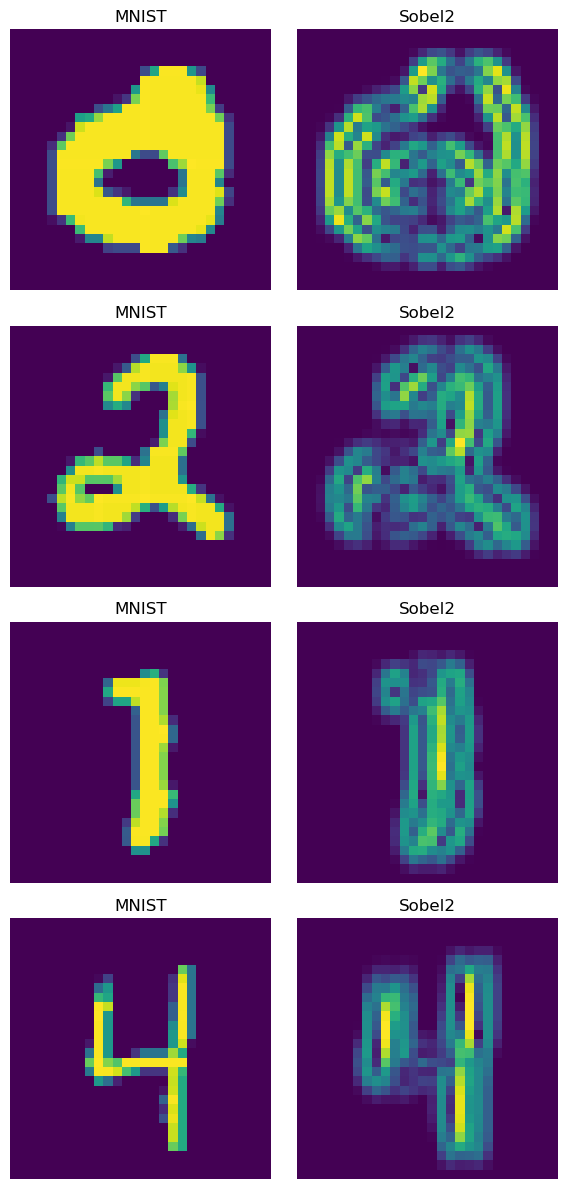

In [8]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia.filters import spatial_gradient

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用Sobel二阶算子
gradients = [spatial_gradient(image, order=2) for image in images]
sobel2_edges = [torch.sqrt(gradient[:, :, 0]**2 + gradient[:, :, 1]**2) for gradient in gradients]

# 显示原始图像和边缘检测后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, sobel2_edge) in enumerate(zip(images, labels, sobel2_edges)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(sobel2_edge[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('Sobel2')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

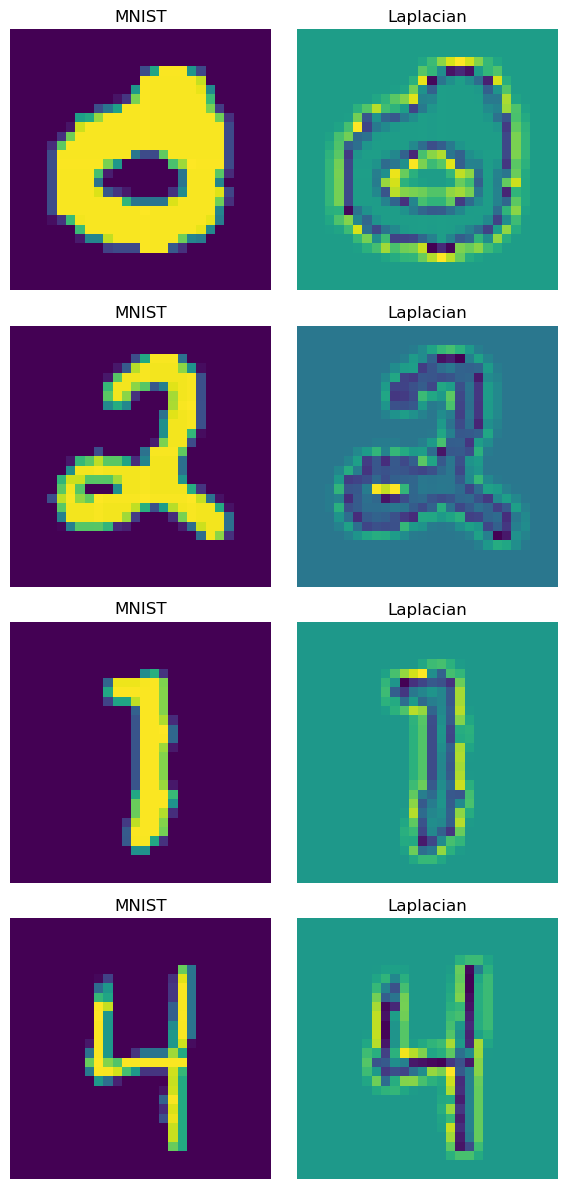

In [9]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia.filters import spatial_gradient, laplacian

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用Laplacian算子
laplacian_edges = [laplacian(input=image, kernel_size=3) for image in images]

# 显示原始图像和Laplacian边缘检测后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, laplacian_edge) in enumerate(zip(images, labels, laplacian_edges)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(laplacian_edge[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('Laplacian')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


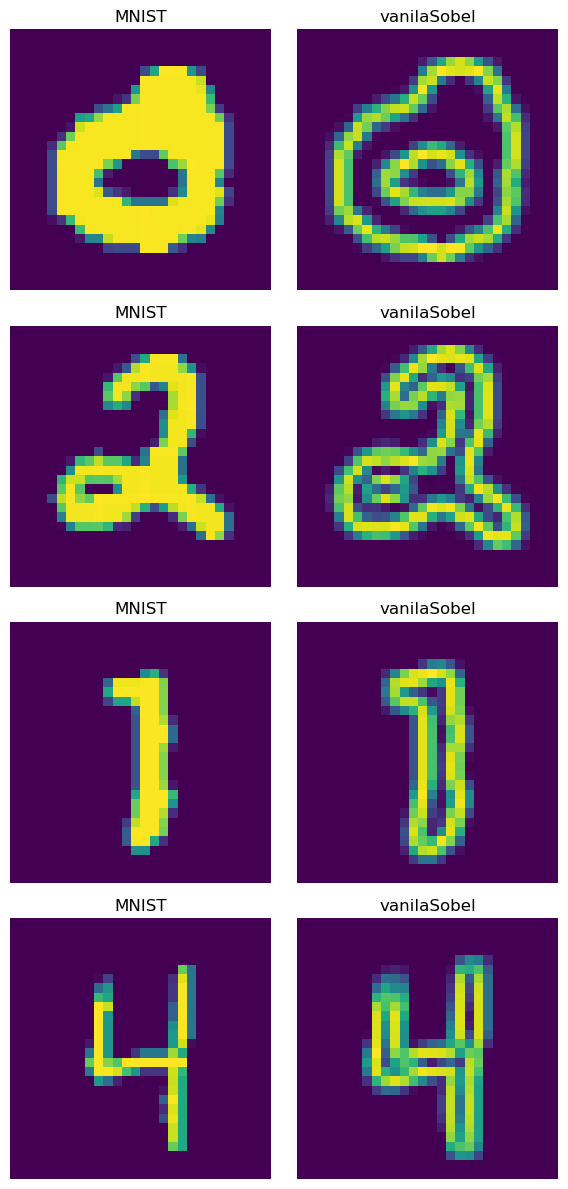

In [12]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia.filters import spatial_gradient, laplacian, Sobel

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用Sobel算子
sobel_edges = [Sobel()(image) for image in images]

# 显示原始图像和Sobel边缘检测后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, sobel_edge) in enumerate(zip(images, labels, sobel_edges)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(sobel_edge[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('vanilaSobel')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

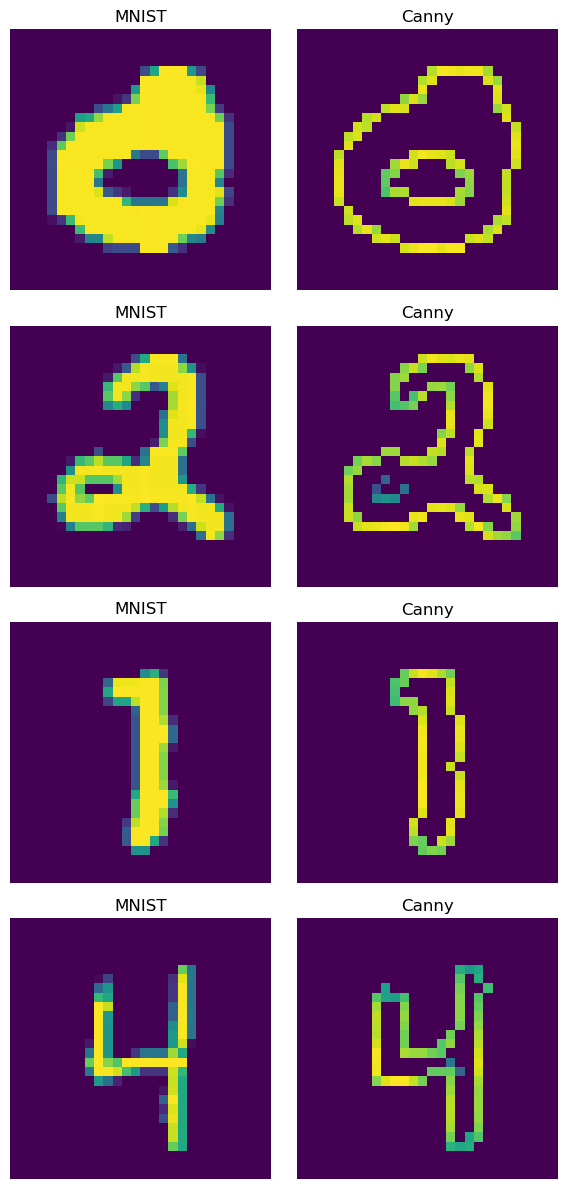

In [6]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia.filters import spatial_gradient, laplacian, Sobel, Canny

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用Canny算子
canny_edges = [Canny()(image) for image in images]

# 显示原始图像和Canny边缘检测后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, canny_edge) in enumerate(zip(images, labels, canny_edges)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(canny_edge[0][0][0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('Canny')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


kornia.filters中的滤波

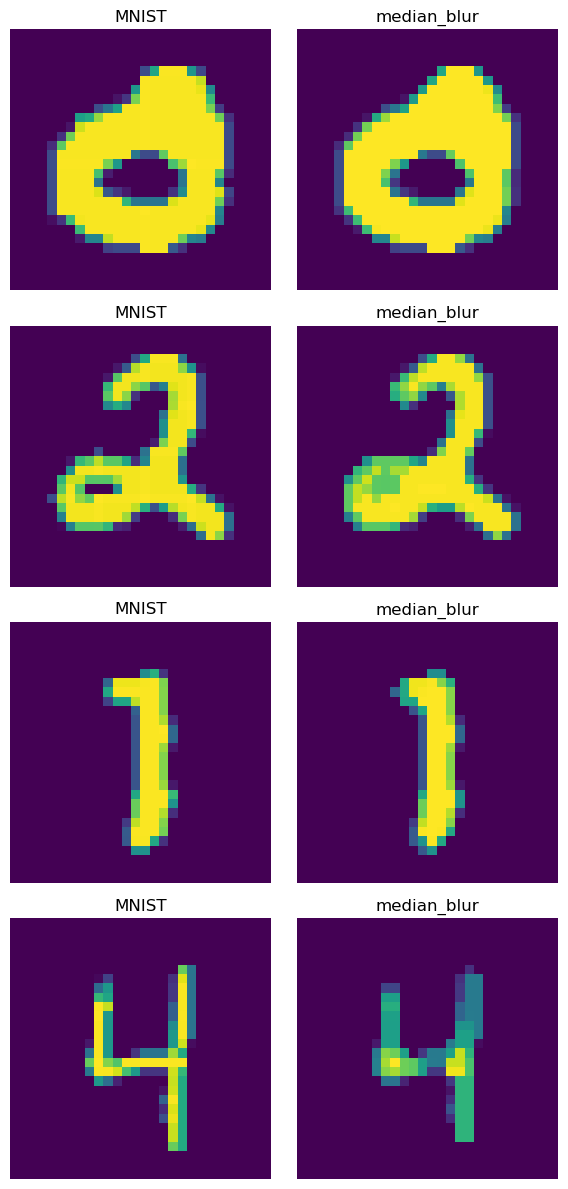

In [13]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia.filters import median_blur

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用中值滤波
median_blur_imgs = [median_blur(image, (3, 3)) for image in images]

# 显示原始图像和中值滤波后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, median_blur_img) in enumerate(zip(images, labels, median_blur_imgs)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(median_blur_img[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('median_blur')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

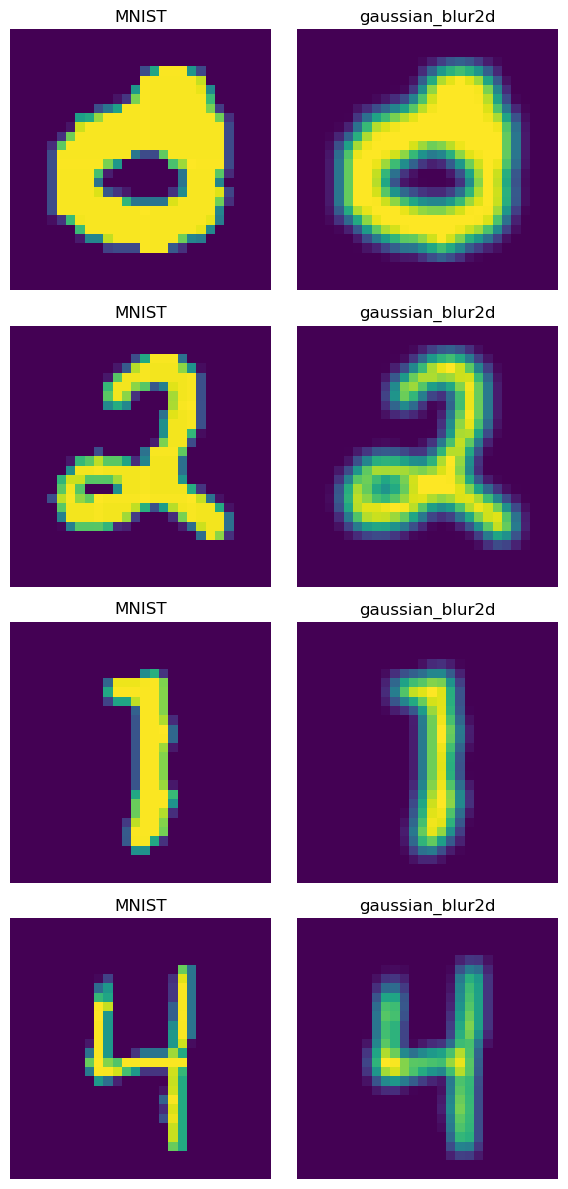

In [15]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia import gaussian_blur2d

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用高斯滤波
gaussian_blur2d_imgs = [gaussian_blur2d(image, (3, 3), (1.5, 1.5)) for image in images]

# 显示原始图像和高斯滤波后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, gaussian_blur2d_img) in enumerate(zip(images, labels, gaussian_blur2d_imgs)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(gaussian_blur2d_img[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('gaussian_blur2d')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

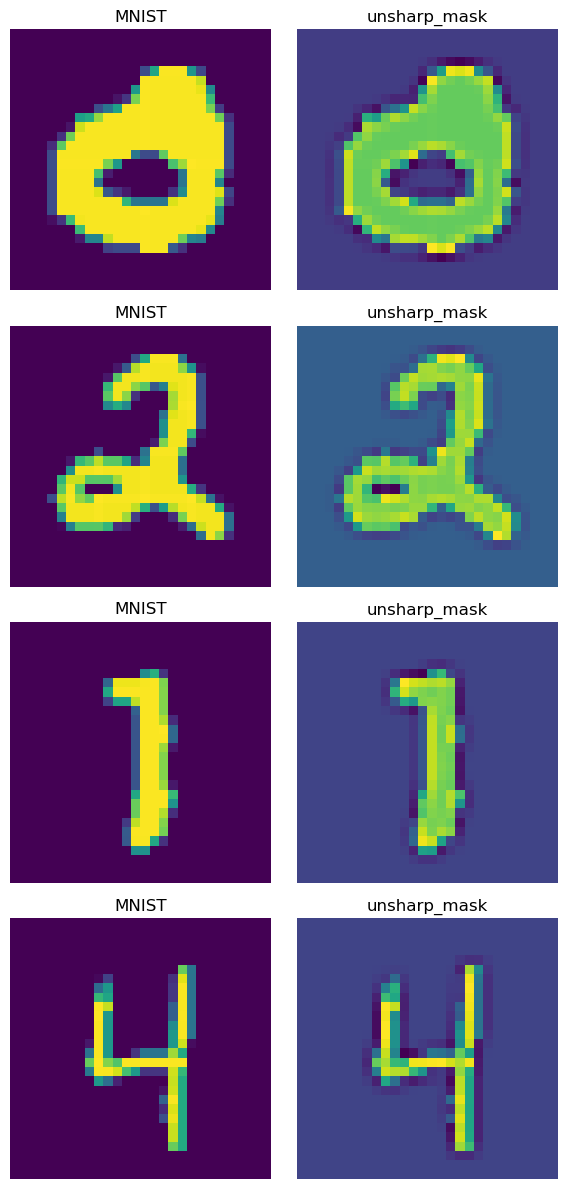

In [14]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia import unsharp_mask

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用unsharp_mask
unsharp_mask_imgs = [unsharp_mask(image, (3, 3), (1.5, 1.5)) for image in images]

# 显示原始图像和unsharp_mask后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, unsharp_mask_img) in enumerate(zip(images, labels, unsharp_mask_imgs)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(unsharp_mask_img[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('unsharp_mask')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

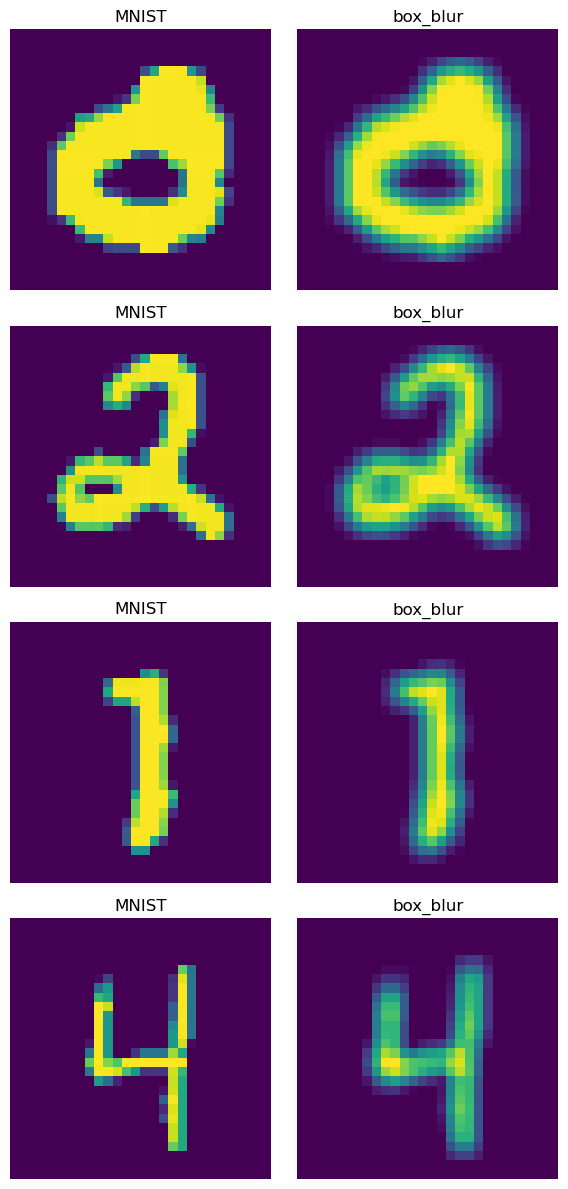

In [16]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia import box_blur

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用高斯滤波
box_blur_imgs = [box_blur(image, (3, 3)) for image in images]

# 显示原始图像和高斯滤波后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, box_blur_img) in enumerate(zip(images, labels, box_blur_imgs)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(box_blur_img[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('box_blur')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

kornia.feature中的角点检测

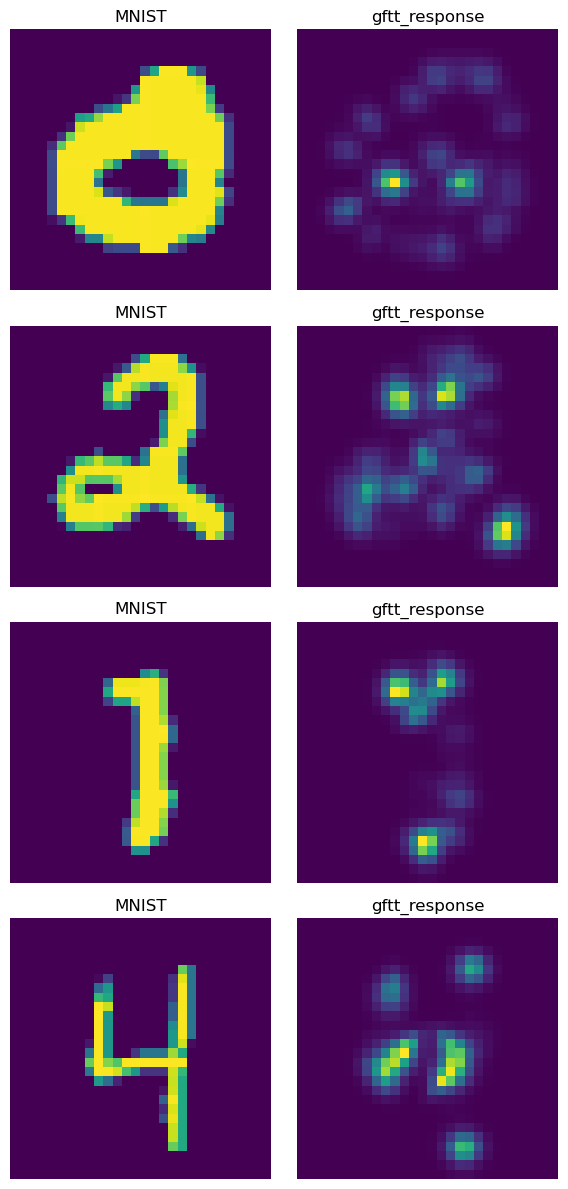

In [18]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia import gftt_response

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用gftt_response角点检测
gftt_response_imgs = [gftt_response(image, grads_mode='sobel') for image in images]

# 显示原始图像和gftt_response角点检测后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, gftt_response_img) in enumerate(zip(images, labels, gftt_response_imgs)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(gftt_response_img[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('gftt_response')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

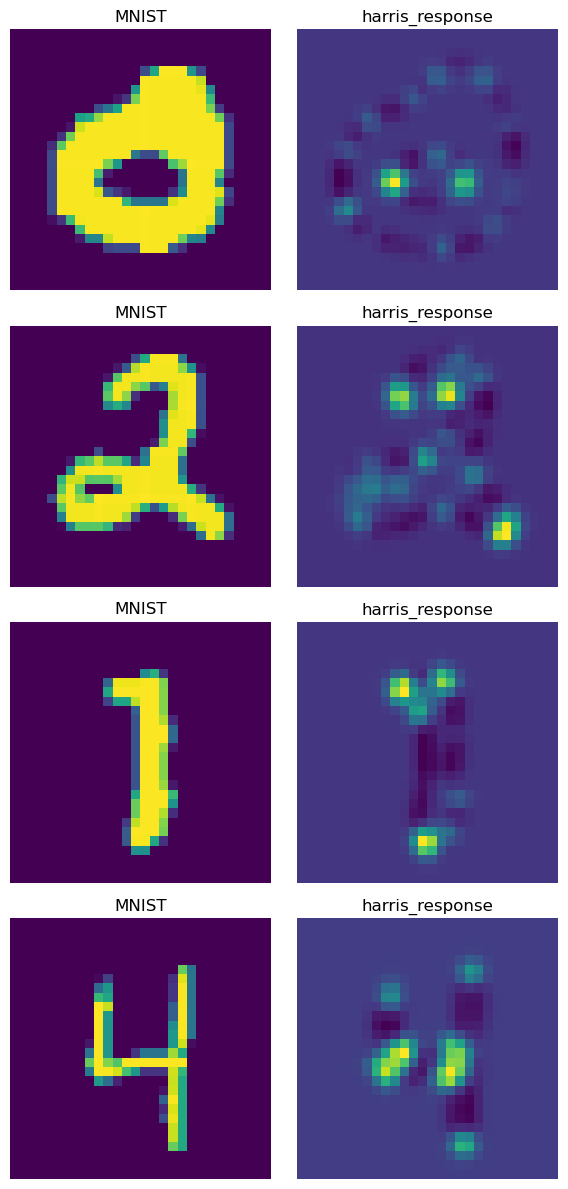

In [19]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia import harris_response

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用harris_responsee角点检测
harris_response_imgs = [harris_response(image, grads_mode='sobel') for image in images]

# 显示原始图像和harris_response角点检测后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, harris_response_img) in enumerate(zip(images, labels, harris_response_imgs)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(harris_response_img[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('harris_response')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

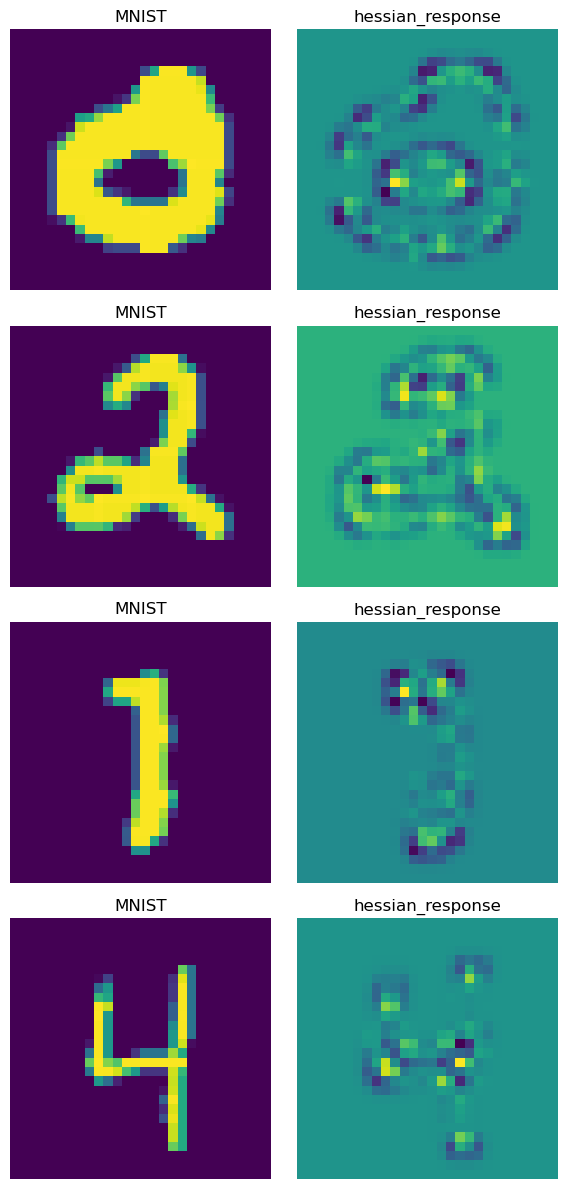

In [20]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia import hessian_response

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用hessian_response角点检测
hessian_response_imgs = [hessian_response(image, grads_mode='sobel') for image in images]

# 显示原始图像和hessian_response角点检测后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, hessian_response_img) in enumerate(zip(images, labels, hessian_response_imgs)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(hessian_response_img[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('hessian_response')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()